In [148]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [149]:
path = r"Data\adult_train.csv"
path1 = r"Data\adult_test.csv"

In [150]:
train = pd.read_csv(path)
test = pd.read_csv(path1)

In [151]:
train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [152]:
test.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [153]:
test = test.dropna(subset=["Target"])

In [154]:
train.Target.value_counts()

 <=50K    24720
 >50K      7841
Name: Target, dtype: int64

In [155]:
le = LabelEncoder()
le.fit(train.Target)

LabelEncoder()

In [156]:
train.Target = le.transform(train.Target)

In [157]:
test.Target = test.Target.apply(lambda x: x[:-1])

In [158]:
test.Target = le.transform(test.Target)

In [159]:
cols_num = train.select_dtypes(include=np.number).columns[:-1]
cols_num

Index(['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss',
       'Hours_per_week'],
      dtype='object')

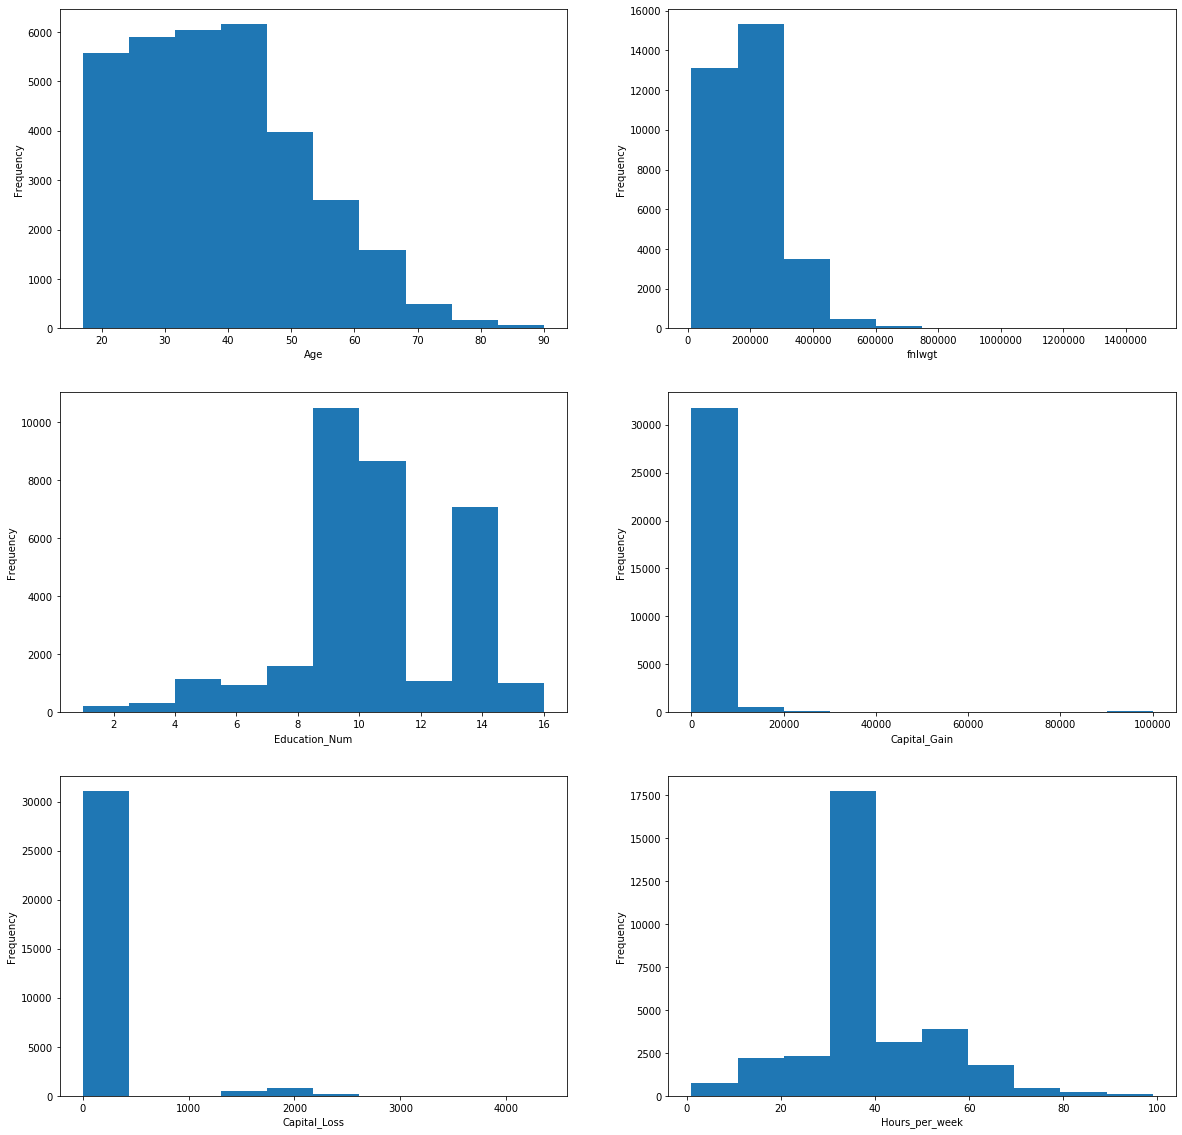

In [160]:
fig, ax = plt.subplots(3, 2, figsize=[20,20])
for i in range(3):
    for j in range(2):
        train[cols_num[i*2+j]].plot(kind="hist", ax=ax[i][j])
        ax[i][j].set_xlabel(cols_num[i*2+j])

In [161]:
cols_cat = train.select_dtypes(include='object').columns
cols_cat

Index(['Workclass', 'Education', 'Martial_Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Country'],
      dtype='object')

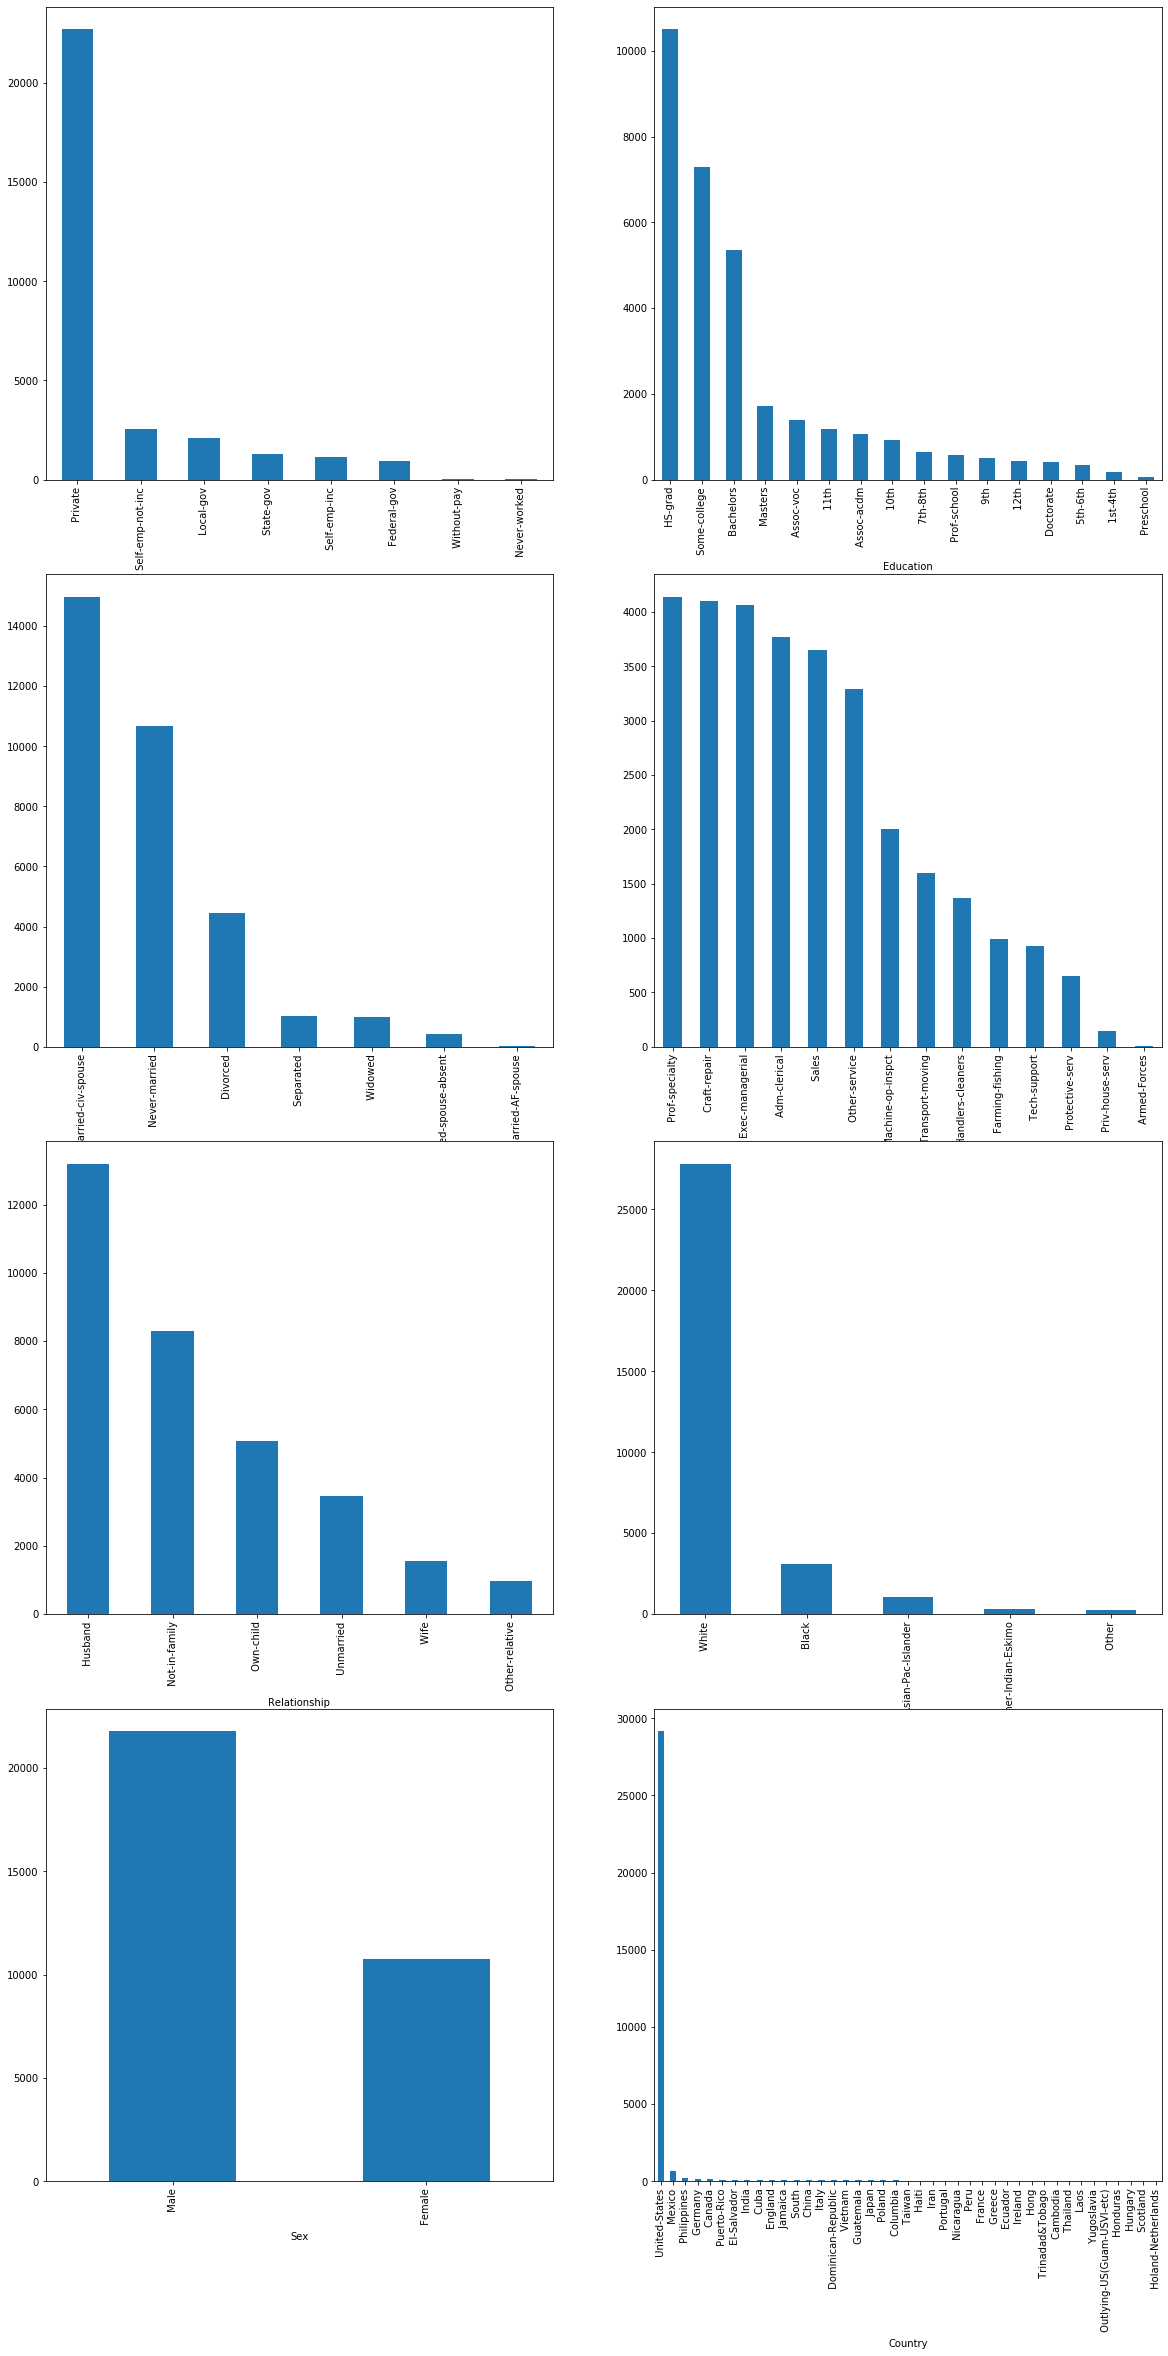

In [162]:
fig, ax = plt.subplots(4, 2, figsize=[20,40])
for i in range(4):
    for j in range(2):
        train[cols_cat[i*2+j]].value_counts().plot(kind="bar", ax=ax[i][j])
        ax[i][j].set_xlabel(cols_cat[i*2+j])

In [163]:
test.Age = test["Age"].astype("int")

In [164]:
for col in cols_num:
    train[col] = train[col].fillna(train[col].mean())

In [165]:
for col in cols_cat:
    train[col] = train[col].fillna(train[col].mode()[0])

In [166]:
for col in cols_num:
    test[col] = test[col].fillna(test[col].mean())

In [167]:
for col in cols_cat:
    test[col] = test[col].fillna(test[col].mode()[0])

In [168]:
for col in cols_cat:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [169]:
for cols in  (X_train.columns):
    if cols not in (list(X_train.columns & X_test.columns)):
        print(cols)

Country_ Holand-Netherlands


In [170]:
X_train = train.drop(columns="Target")
y_train = train.Target
X_test = test.drop(columns="Target")
y_test = test.Target

In [171]:
dec_tree = DecisionTreeClassifier(max_depth=3, random_state=17)
dec_tree.fit(X_train, y_train)
dec_score = dec_tree.score(X_test, y_test)
dec_score

0.839199066396413

In [172]:
tree_params = {'max_depth' : range(2,11)}
tree_params

{'max_depth': range(2, 11)}

In [173]:
dt = DecisionTreeClassifier(random_state=17)
grid = GridSearchCV(dt, tree_params)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.8568883975185799

In [174]:
grid.best_params_

{'max_depth': 7}